In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

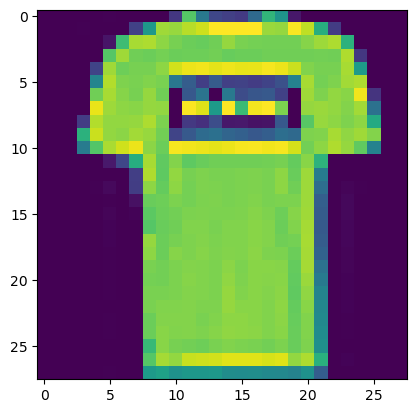

In [3]:
# There are 10 image classes in this dataset and each class has a mapping corresponding to the followinglabels:
#0 T-shirt/top
#1 Trouser
#2 pullover
#3 Dress
#4 Coat
#5 sandals
#6 shirt
#7 sneaker
#8 bag
#9 ankle boot
plt.imshow(x_train[1])

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

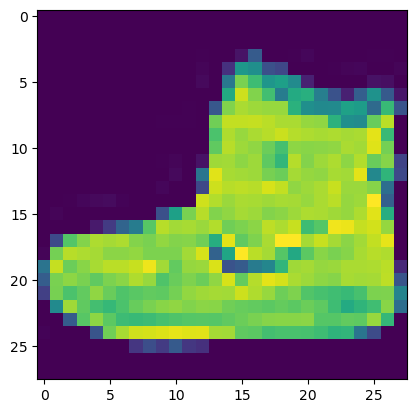

In [6]:
plt.imshow(x_train[0])

In [7]:
# Next, we will preprocess the data by scaling the pixel values to be between 0 and 1, and then reshapingthe images to be 28x28 pixels.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# 28, 28 comes from width, height, 1 comes from the number of channels# -1 means that the length in that dimension is inferred.
# This is done based on the constraint that the number of elements in an ndarray or Tensor whenreshaped must remain the same.
# each image is a row vector (784 elements) and there are lots of such rows (let it be n, so there are 784nelements). SoTensorFlow can infer that -1 is n.
# converting the training_images array to 4 dimensional array with sizes 60000, 28, 28, 1 for 0th to 3rddimension.

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_test.shape

(10000, 28, 28, 1)

In [11]:
y_train.shape

(60000,)

In [12]:
y_test.shape

(10000,)

In [13]:
# We will use a convolutional neural network (CNN) to classify the fashion items.# The CNN will consist of multiple convolutional layers followed by max pooling,# dropout, and dense layers. Here is the code for the model:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    # 32 filters (default), randomly initialized 3*3 is Size of Filter 28,28,1 size of Input Image
    # No zero-padding: every output 2 pixels less in every dimension in Paramter shwon 320 is 
    # value of weights: (3x3 filter weights + 32 bias) * 32 filters 
    #32*3*3=288(Total)+32(bias)= 320
    keras.layers.MaxPooling2D((2,2)),
    # It shown 13 * 13 size image with 32 channel or filter or depth
    keras.layers.Dropout(0.25),
    # Reduce Overfitting of Training sample drop out 25% Neuron
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    # Deeper layers use 64 filters# 3*3 is Size of Filter
    # Observe how the input image on 28x28x1 is transformed to a 3x3x64 feature map
    # 13(Size)-3(Filter Size )+1(bias)=11 Size for Width and Height with 64 Depth or filtter or channel# in Paramter shwon 18496 is value of weights: (3x3 filter weights + 64 bias) * 64 filters
    # 64*3*3=576+1=577*32 + 32(bias)=18496
    keras.layers.MaxPooling2D((2,2)),
    # It shown 5 * 5 size image with 64 channel or filter or depth.
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    # Deeper layers use 128 filters
    # 3*3 is Size of Filter
    # Observe how the input image on 28x28x1 is transformed to a 3x3x128 feature map
    # It show 5(Size)-3(Filter Size )+1(bias)=3 Size for Width and Height with 64 Depth or filtter orchannel
    # 128*3*3=1152+1=1153*64 + 64(bias)= 73856
    # To classify the images, we still need a Dense and Softmax layer.
    # We need to flatten the 3x3x128 feature map to a vector of size 1152
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    # 128 Size of Node in Dense Layer
    # 1152*128 = 147584
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
    # 10 Size of Node another Dense Layer
    # 128*10+10 bias= 1290
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [16]:
# Compile and Train the Model
# After defining the model, we will compile it and train it on the training data.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

1875/1875 [==============================] - 44s 23ms/step - loss: 0.3972 - accuracy: 0.8537 - val_loss: 0.3230 - val_accuracy: 0.8841


In [17]:
# 1875 is a number of batches. By default batches contain 32 samles.60000 / 32 = 1875
# Finally, we will evaluate the performance of the model on the test data.
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.3230 - accuracy: 0.8841
Test accuracy: 0.8841000199317932


313/313 [==============================] - 2s 6ms/step


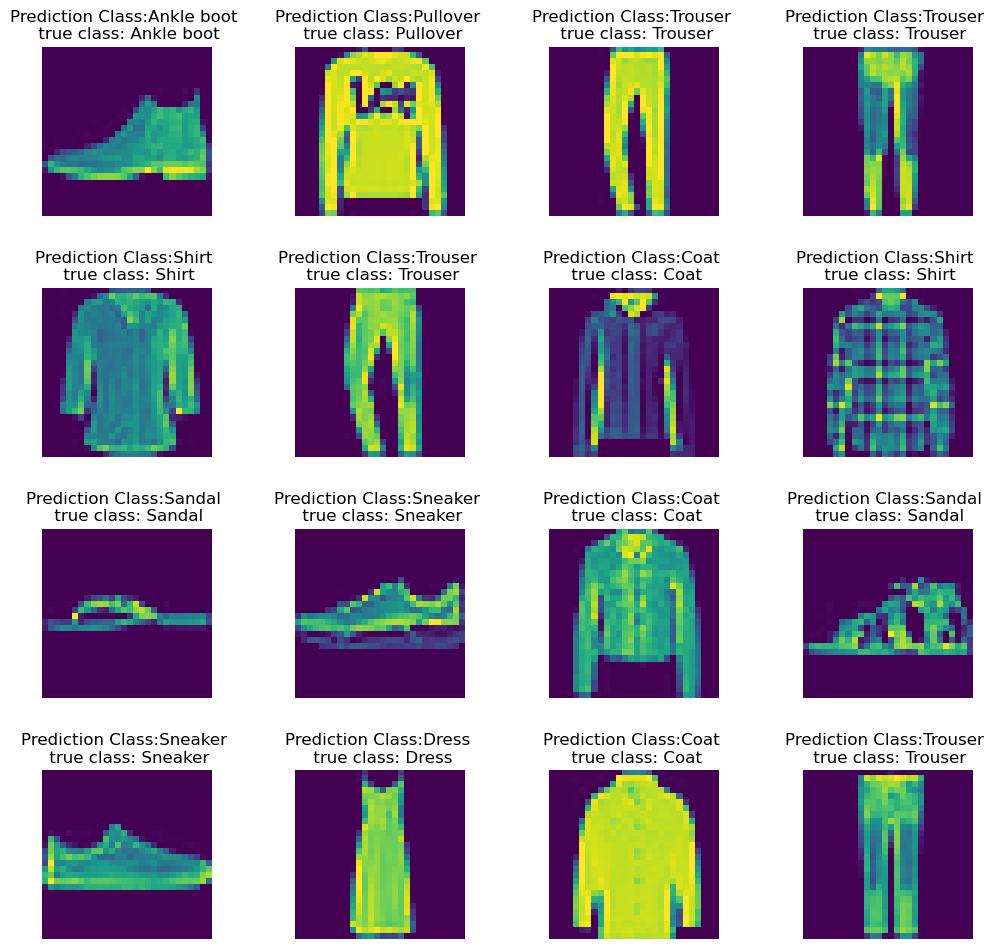

In [20]:
predicted_classes = np.argmax(model.predict(x_test),axis=-1)

L = 4
W = 4

fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(class_names[predicted_classes[i]],class_names[y_test[i]]))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5) 